**Q 1: Take any data from the internet and form a supervised machine learning problem around it.**

Here the dataset used is called [Boston Housing](https://www.kaggle.com/c/boston-housing#description) available from  [Kaggle](https://www.kaggle.com/).

features = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad','tax', 'ptratio', 'black', 'lstat']

target = ['medv']

Now takes the input varibale as (features) and output variables as (target) and maps them in such a way that: target=f(features).Hence we can form a supervised learning problem where we can use different parameters to predict the value of houses.

**Q 2: What is the difference between a dataframe and a series? What are the different types of datatypes present in Pandas?**

A Series is a one-dimensional object that can hold any data type such as integers, floats and strings.A DataFrame is a two dimensional object that can have columns with potential different types. Different kind of inputs include dictionaries, lists, series, and even another DataFrame.We can say that a dataframe is a collection of series that can be used to analyse the data.

The different datatypes are:

object,
int64,
float64,
datetime64,
bool,
category,
timedelta,

**Q 3: Explain all the metrics which I have written codes about. For example, explain what did you infer from the code df.describe()**

	   #Passengers
count	144.000000  - count the total number of elements

mean	280.298611  - mean or average

std	    119.966317  - standard deviation

min	    104.000000  - minimum value

25%	    180.000000  - 25th percentile

50%	    265.500000  - 50th percentile

75%	    360.500000  - 75th percentile

max	    622.000000  - maximum value

**Q 4: Analyze the mean temperature data which be attached with the files on Github**


# *Before Making correction in the assignment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from pandas.plotting import register_matplotlib_converters
from datetime import datetime

In [2]:
plt.rcParams["figure.figsize"] = [16,9]

In [3]:
df=pd.read_csv(r"./test_DailyDelhiClimateTest.csv")

In [4]:
df['date']=pd.to_datetime(df['date'], infer_datetime_format=True)

In [5]:
df.head()

,date,meantemp
0,2017-01-01,15.913043
1,2017-02-01,18.500000
2,2017-03-01,17.111111
3,2017-04-01,18.700000
4,2017-05-01,18.388889


In [6]:
df.sort_values(by='date',inplace=True)

In [7]:
df.head()

,date,meantemp
0,2017-01-01,15.913043
31,2017-01-02,15.250000
59,2017-01-03,24.461538
90,2017-01-04,31.375000
12,2017-01-13,13.235294


In [8]:
df.shape


(114, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 0 to 101
Data columns (total 2 columns):
date        114 non-null datetime64[ns]
meantemp    114 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.7 KB


In [10]:
df.isnull().any()

date        False
meantemp    False
dtype: bool

In [11]:
df.describe()

,meantemp
count,114.000000
mean,21.713079
std,6.360072
min,11.000000
25%,16.437198
50%,19.875000
75%,27.705357
max,34.500000


In [12]:
x_axis=df['date']
y_axis=df['meantemp']

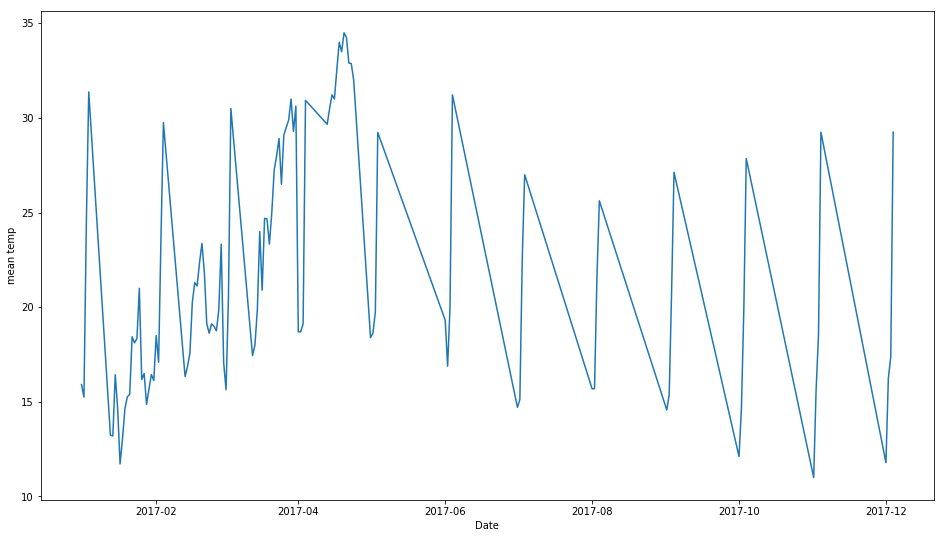

In [13]:
plt.xlabel('Date')
plt.ylabel('mean temp')
plt.plot(x_axis,y_axis)
plt.show()

As we can infer from the graph that the output variable is not constant w.r.t time and neither its changing linearly as we see from sudden spikes with the abrupt rise and fall in temperature.But we cannot deduce much information from the graph.

In [14]:
from pandas import DataFrame
from pandas import Grouper
df2 = pd.read_csv(r"./test_DailyDelhiClimateTest.csv",header=0, index_col=0,parse_dates=True,squeeze=True)
print(df2.head(5))
groups = df2.groupby(Grouper(freq='M'))
months = DataFrame()

date
2017-01-01    15.913043
2017-02-01    18.500000
2017-03-01    17.111111
2017-04-01    18.700000
2017-05-01    18.388889
Name: meantemp, dtype: float64


In [15]:
for date, group in groups:
    print(date,group)

2017-01-31 00:00:00 date
2017-01-01    15.913043
2017-01-02    15.250000
2017-01-03    24.461538
2017-01-04    31.375000
2017-01-13    13.235294
2017-01-14    13.200000
2017-01-15    16.434783
2017-01-16    14.650000
2017-01-17    11.722222
2017-01-18    13.041667
2017-01-19    14.619048
2017-01-20    15.263158
2017-01-21    15.391304
2017-01-22    18.440000
2017-01-23    18.117647
2017-01-24    18.347826
2017-01-25    21.000000
2017-01-26    16.178571
2017-01-27    16.500000
2017-01-28    14.863636
2017-01-29    15.666667
2017-01-30    16.444444
2017-01-31    16.125000
Name: meantemp, dtype: float64
2017-02-28 00:00:00 date
2017-02-01    18.500000
2017-02-02    17.090909
2017-02-03    23.750000
2017-02-04    29.750000
2017-02-13    16.333333
2017-02-14    16.875000
2017-02-15    17.571429
2017-02-16    20.250000
2017-02-17    21.300000
2017-02-18    21.125000
2017-02-19    22.363636
2017-02-20    23.375000
2017-02-21    21.833333
2017-02-22    19.125000
2017-02-23    18.625000
2017-02

In [16]:
for date, group in groups:
    print(date.month,group.values)

1 [ 15.91304348  15.25        24.46153846  31.375       13.23529412  13.2
  16.43478261  14.65        11.72222222  13.04166667  14.61904762
  15.26315789  15.39130435  18.44        18.11764706  18.34782609  21.
  16.17857143  16.5         14.86363636  15.66666667  16.44444444  16.125     ]
2 [ 18.5         17.09090909  23.75        29.75        16.33333333  16.875
  17.57142857  20.25        21.3         21.125       22.36363636  23.375
  21.83333333  19.125       18.625       19.125       19.          18.75
  19.875       23.33333333]
3 [ 17.11111111  15.63636364  20.5         30.5         17.44444444  18.
  19.875       24.          20.9         24.69230769  24.66666667
  23.33333333  25.          27.25        28.          28.91666667  26.5
  29.1         29.5         29.88888889  31.          29.28571429  30.625     ]
4 [ 18.7         18.7         19.125       30.93333333  29.66666667  30.5
  31.22222222  31.          32.55555556  34.          33.5         34.5
  34.25        32.9  

In [17]:
for date, group in groups:
    """"months[date.month] = group.values""" #will throw value error:length of values does not match length of index  
    months[date.month] = pd.Series(group.values)



In [18]:
months.info()
months.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 12 columns):
1     23 non-null float64
2     20 non-null float64
3     23 non-null float64
4     16 non-null float64
5     4 non-null float64
6     4 non-null float64
7     4 non-null float64
8     4 non-null float64
9     4 non-null float64
10    4 non-null float64
11    4 non-null float64
12    4 non-null float64
dtypes: float64(12)
memory usage: 2.2 KB


,1,2,3,4,5,6,7,8,9,10,11,12
0,15.913043,18.500000,17.111111,18.700000,18.388889,19.318182,14.708333,15.684211,14.571429,12.111111,11.000000,11.789474
1,15.250000,17.090909,15.636364,18.700000,18.631579,16.888889,15.125000,15.700000,15.375000,14.666667,15.625000,16.250000
2,24.461538,23.750000,20.500000,19.125000,19.750000,20.000000,22.625000,21.545455,20.785714,19.937500,18.533333,17.375000
3,31.375000,29.750000,30.500000,30.933333,29.230769,31.222222,27.000000,25.625000,27.125000,27.857143,29.250000,29.250000
4,13.235294,16.333333,17.444444,29.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,13.200000,16.875000,18.000000,30.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,16.434783,17.571429,19.875000,31.222222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,14.650000,20.250000,24.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,11.722222,21.300000,20.900000,32.555556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,13.041667,21.125000,24.692308,34.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


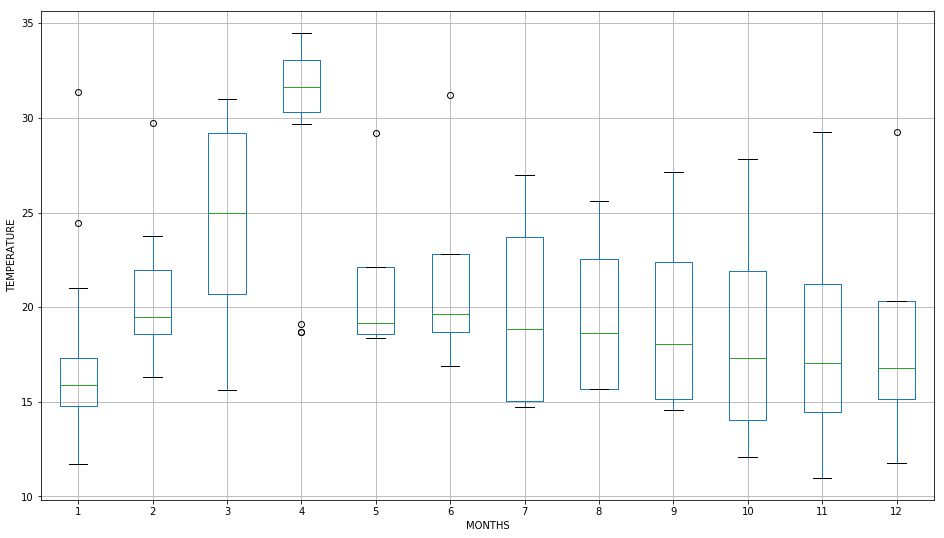

In [19]:
plt.xlabel('MONTHS')
plt.ylabel('TEMPERATURE')
months.boxplot()
plt.show()

Boxplot gives us a wider picture of the dataset like where the outlier lies, median,max and min temp etc. 

In [20]:
months.describe()

,1,2,3,4,5,6,7,8,9,10,11,12
count,23.000000,20.000000,23.000000,16.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,16.793080,20.397549,24.857630,29.776736,21.500309,21.857323,19.864583,19.638666,19.464286,18.643105,18.602083,18.666118
std,4.179530,3.130938,4.916178,5.599661,5.187618,6.384449,5.988451,4.851902,5.805027,6.953487,7.746775,7.456796
min,11.722222,16.333333,15.636364,18.700000,18.388889,16.888889,14.708333,15.684211,14.571429,12.111111,11.000000,11.789474
25%,14.756818,18.593750,20.700000,30.291667,18.570906,18.710859,15.020833,15.696053,15.174107,14.027778,14.468750,15.134868
50%,15.913043,19.500000,25.000000,31.611111,19.190789,19.659091,18.875000,18.622727,18.080357,17.302083,17.079167,16.812500
75%,17.308824,21.965909,29.192857,33.050000,22.120192,22.805556,23.718750,22.565341,22.370536,21.917411,21.212500,20.343750
max,31.375000,29.750000,31.000000,34.500000,29.230769,31.222222,27.000000,25.625000,27.125000,27.857143,29.250000,29.250000


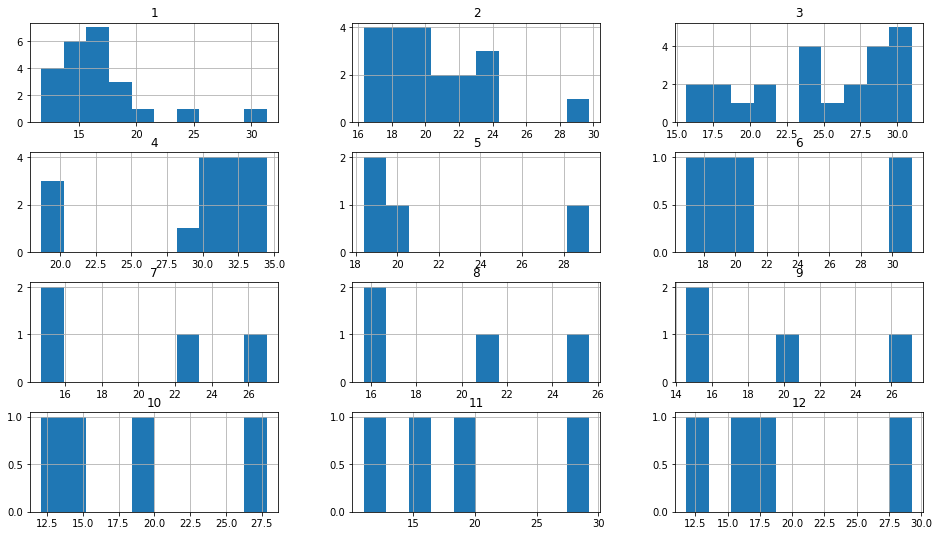

In [21]:

months.hist()

plt.show()

Here we can see the histogram plot for each month in different subplots

**Q 4 *or* 6: Analyze the mean temperature data which be attached with the files on Github**

# *After Correction in assignment

In [49]:
import pandas as pd
import numpy as np
from pandas import Grouper
from pandas import DataFrame
import matplotlib.pyplot as plt

from datetime import datetime

In [50]:
plt.rcParams["figure.figsize"] = [16,9]

In [51]:
df=pd.read_csv(r"./testset.csv")

In [52]:
df.head()

,datetime,Temperature
0,19961101-11:00,30.0
1,19961101-12:00,28.0
2,19961101-13:00,24.0
3,19961101-14:00,24.0
4,19961101-16:00,23.0


In [53]:
#df['datetime']=pd.to_datetime(df['datetime'], infer_datetime_format=True)
""" OR """
df['datetime'] = pd.to_datetime(df['datetime'].apply(lambda x: datetime.strptime(x,"%Y%m%d-%H:%M").strftime("%Y-%m-%d %H:%M")),errors='coerce')


In [54]:
df.head()

,datetime,Temperature
0,1996-11-01 11:00:00,30.0
1,1996-11-01 12:00:00,28.0
2,1996-11-01 13:00:00,24.0
3,1996-11-01 14:00:00,24.0
4,1996-11-01 16:00:00,23.0


In [55]:
df['datetime'].head()

0   1996-11-01 11:00:00
1   1996-11-01 12:00:00
2   1996-11-01 13:00:00
3   1996-11-01 14:00:00
4   1996-11-01 16:00:00
Name: datetime, dtype: datetime64[ns]

### Q 5: Read about the functions used in the code and write about it 
data['datetime'] = pd.to_datetime(data['datetime'].apply(lambda x: datetime.strptime(x,"%Y%m%d-%H:%M").strftime("%Y-%m-%d %H:%M")))



pd.to_datetime : converts argument to datetime.

df.apply: apply a function along an axis of the dataframe

datetime.stftime: convert object to a string according to a given format

datetime.strptime: parse a string into a datetime object givebn a corresponding format

So overall lambda functon is being applied to 'datetime' column. Within the lamdba function .strptime is converting the string into datetime object given YearMonthDate-Hour:Mins format, then this datetime object is converted into string in the format Year-Month-Date Hour:Mins.Finally this string is feed as argument to to_datetime method and returns datetime output.      

In [56]:
df.isnull().any()

datetime       False
Temperature     True
dtype: bool

In [57]:
boolean=df['Temperature'].isnull() #isnull also works for NaT

In [58]:
df[boolean].count() #[180:]

datetime       673
Temperature      0
dtype: int64

In [59]:
df = df.set_index('datetime',drop=True)
df.index.name = 'datetime'

In [60]:
df.head()

,Temperature
datetime,
1996-11-01 11:00:00,30.0
1996-11-01 12:00:00,28.0
1996-11-01 13:00:00,24.0
1996-11-01 14:00:00,24.0
1996-11-01 16:00:00,23.0


In [61]:
groups2 = df.groupby(Grouper(freq='A'))
years= DataFrame()

In [62]:
for date, group in groups2:
    print(date.year,group.values)

1996 [[ 30.]
 [ 28.]
 [ 24.]
 ..., 
 [ 10.]
 [  9.]
 [  9.]]
1997 [[  9.]
 [  9.]
 [  9.]
 ..., 
 [ 15.]
 [ 13.]
 [ 11.]]
1998 [[ 15.]
 [ 17.]
 [ 17.]
 ..., 
 [ 14.]
 [ 10.]
 [ nan]]
1999 [[ nan]
 [ nan]
 [  7.]
 ..., 
 [  6.]
 [  6.]
 [  6.]]
2000 [[  7.]
 [  8.]
 [  9.]
 ..., 
 [ 15.]
 [ 15.]
 [ 15.]]
2001 [[ 14.]
 [ 13.]
 [ 13.]
 ..., 
 [  9.]
 [  7.]
 [  6.]]
2002 [[ 7.]
 [ 7.]
 [ 8.]
 ..., 
 [ 9.]
 [ 9.]
 [ 8.]]
2003 [[ nan]
 [  9.]
 [  9.]
 ..., 
 [  9.]
 [  9.]
 [  9.]]
2004 [[  9.]
 [  9.]
 [  8.]
 ..., 
 [ 17.]
 [ 17.]
 [ 16.]]
2005 [[ 16.]
 [ 14.]
 [ 18.]
 ..., 
 [ 12.]
 [ 10.]
 [  9.]]
2006 [[  7.]
 [  8.]
 [ 21.]
 ..., 
 [ 18.]
 [ 13.]
 [ 11.]]
2007 [[ 11.]
 [ 11.]
 [ 12.]
 ..., 
 [ 11.]
 [  9.]
 [  7.]]
2008 [[  4.]
 [  4.]
 [ 16.]
 ..., 
 [ 11.]
 [ 10.]
 [ 10.]]
2009 [[  9.]
 [ 10.]
 [ 10.]
 ..., 
 [ 11.]
 [ 10.]
 [  9.]]
2010 [[  8.]
 [  9.]
 [ 18.]
 ..., 
 [ 11.]
 [ 10.]
 [  9.]]
2011 [[ 10.]
 [ 10.]
 [ 13.]
 ..., 
 [ 15.]
 [ 12.]
 [ 13.]]
2012 [[ 14.]
 [ 14.]
 [ 18.]
 

In [63]:
for i in groups2:
    print(i)

(Timestamp('1996-12-31 00:00:00', freq='A-DEC'),                      Temperature
datetime                        
1996-11-01 11:00:00         30.0
1996-11-01 12:00:00         28.0
1996-11-01 13:00:00         24.0
1996-11-01 14:00:00         24.0
1996-11-01 16:00:00         23.0
1996-11-01 17:00:00         21.0
1996-11-01 18:00:00         21.0
1996-11-01 19:00:00         21.0
1996-11-01 20:00:00         19.0
1996-11-01 21:00:00         19.0
1996-11-01 22:00:00         19.0
1996-11-01 23:00:00         19.0
1996-11-02 00:00:00         19.0
1996-11-02 01:00:00         19.0
1996-11-02 02:00:00         20.0
1996-11-02 03:00:00         22.0
1996-11-02 04:00:00         23.0
1996-11-02 05:00:00         26.0
1996-11-02 06:00:00         28.0
1996-11-02 07:00:00         30.0
1996-11-02 08:00:00         31.0
1996-11-02 09:00:00         31.0
1996-11-02 10:00:00         31.0
1996-11-02 11:00:00         30.0
1996-11-02 12:00:00         27.0
1996-11-02 13:00:00         25.0
1996-11-02 14:00:00        

In [68]:
for date, group in groups2:
    """years[date.year] = group.values""" #will throw value error:length of values does not match length of index
    """years[date.year] = pd.Series(group.values)""" #will throw exception "Data must be 1 dimensional " as the group.values is 2 dimension
    years[date.year] = pd.Series(np.reshape(group.values,len(group.values)))


In [69]:
years.head()

,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,30.0,9.0,15.0,NaN,7.0,14.0,7.0,NaN,9.0,16.0,...,4.0,9.0,8.0,10.0,14.0,7.0,13.0,10.0,8.0,10.0
1,28.0,9.0,17.0,NaN,8.0,13.0,7.0,9.0,9.0,14.0,...,4.0,10.0,9.0,10.0,14.0,9.0,12.0,11.0,10.0,9.0
2,24.0,9.0,17.0,7.0,9.0,13.0,8.0,9.0,8.0,18.0,...,16.0,10.0,18.0,13.0,18.0,14.0,16.0,18.0,20.0,9.0
3,24.0,NaN,14.0,8.0,9.0,13.0,10.0,9.0,8.0,22.0,...,20.0,17.0,21.0,16.0,18.0,13.0,18.0,21.0,23.0,9.0
4,23.0,12.0,13.0,9.0,10.0,13.0,10.0,11.0,8.0,19.0,...,17.0,17.0,19.0,14.0,17.0,10.0,16.0,19.0,21.0,9.0


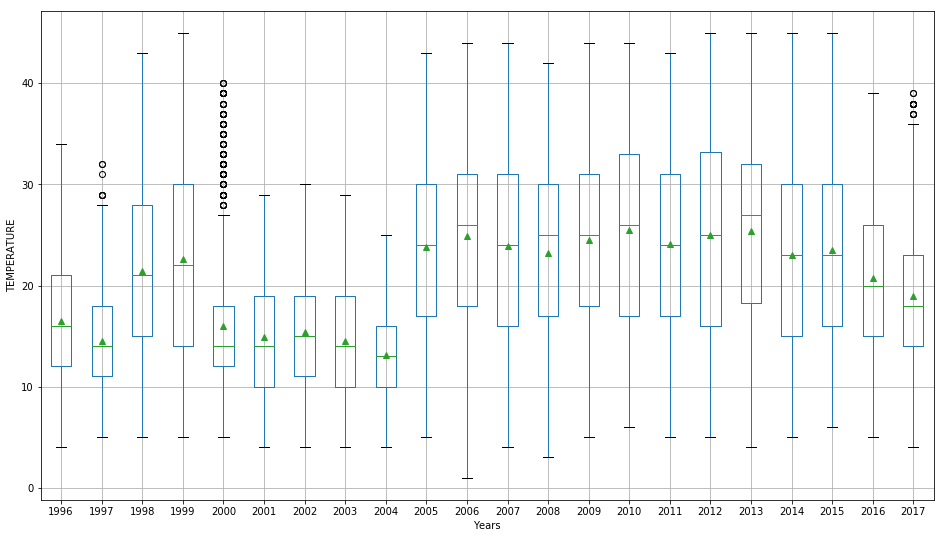

In [72]:
plt.xlabel('Years')
plt.ylabel('TEMPERATURE')
years.boxplot(showmeans=True)
plt.show()

Boxplot gives us a wider picture of the dataset like where the outlier lies,mean, median,max and min temp of the year. Mean temperature are display as triangle in the plot

In [73]:
years.describe()

,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,1261.000000,1264.000000,1262.000000,1263.000000,1267.000000,1269.000000,1261.000000,1270.000000,1262.000000,1272.000000,...,1278.000000,1274.000000,1274.000000,1275.000000,1276.000000,1274.000000,1274.000000,1272.000000,1276.000000,1277.000000
mean,16.518636,14.479430,21.425515,22.590657,15.995264,14.886525,15.369548,14.469291,13.120444,23.762579,...,23.205008,24.467818,25.454474,24.099608,25.014890,25.355573,23.058870,23.491352,20.693574,19.006265
std,5.805499,4.921189,8.404452,9.451912,6.710910,5.873513,5.206970,5.487022,4.042174,8.876560,...,8.945510,8.640193,9.864433,9.211638,9.958215,9.119350,8.965176,8.993393,7.105656,6.734087
min,4.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,5.000000,...,3.000000,5.000000,6.000000,5.000000,5.000000,4.000000,5.000000,6.000000,5.000000,4.000000
25%,12.000000,11.000000,15.000000,14.000000,12.000000,10.000000,11.000000,10.000000,10.000000,17.000000,...,17.000000,18.000000,17.000000,17.000000,16.000000,18.250000,15.000000,16.000000,15.000000,14.000000
50%,16.000000,14.000000,21.000000,22.000000,14.000000,14.000000,15.000000,14.000000,13.000000,24.000000,...,25.000000,25.000000,26.000000,24.000000,25.000000,27.000000,23.000000,23.000000,20.000000,18.000000
75%,21.000000,18.000000,28.000000,30.000000,18.000000,19.000000,19.000000,19.000000,16.000000,30.000000,...,30.000000,31.000000,33.000000,31.000000,33.250000,32.000000,30.000000,30.000000,26.000000,23.000000
max,34.000000,32.000000,43.000000,45.000000,40.000000,29.000000,30.000000,29.000000,25.000000,43.000000,...,42.000000,44.000000,44.000000,43.000000,45.000000,45.000000,45.000000,45.000000,39.000000,39.000000


In [74]:
years.median()

1996    16.0
1997    14.0
1998    21.0
1999    22.0
2000    14.0
2001    14.0
2002    15.0
2003    14.0
2004    13.0
2005    24.0
2006    26.0
2007    24.0
2008    25.0
2009    25.0
2010    26.0
2011    24.0
2012    25.0
2013    27.0
2014    23.0
2015    23.0
2016    20.0
2017    18.0
dtype: float64

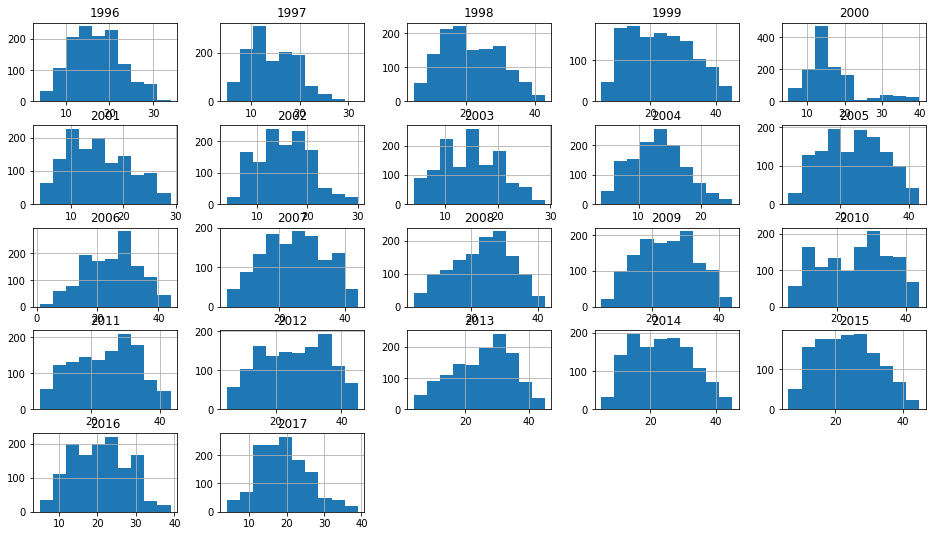

In [75]:
years.hist()

plt.show()